# Experiment 1

In [1]:
# import random
# random.seed(0)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

In [2]:
import logging

from src.simulation import Simulation
from src.network import Network
from src.render import Render

logging.disable(logging.CRITICAL)

In [3]:
# Relative Path to Network INP File
network_file = 'networks/Net3.inp'
# Create the environment
env = Network(network_file)
# Get all the nodes in the network with degree = 1 - these will be the possible start nodes
g = env.water_network_model.to_graph().to_undirected()
deg = g.degree
start_pool = [node for node, degree in deg if degree == 1]
print(f"Start pool: {start_pool}")
print(f"Number of start nodes: {len(start_pool)}")
print(f"Number of nodes: {len(g.nodes)}")

Start pool: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2', '3']
Number of start nodes: 16
Number of nodes: 97


## Create simulations
### Simulation parameters:
- env: the network environment - Net3
- num_agents: the number of agents to create - 10
- swarm: whether to use swarm intelligence - all of options will be tested
- swarm_config: the swarm configuration - all of options will be tested
- start_node: the start node for the simulation - 15 nodes from the start node pool
- max_turns: the maximum number of turns to run the simulation - 100

In [4]:
start_nodes = start_pool[:15]
num_agents = 10
max_turns = 100

print(f"Start nodes: {start_nodes}")

Start nodes: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2']


### Experiment 1.1
- env: Net3
- num_agents: 10
- swarm: False
- swarm_config: None
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/NoSwarm

In [5]:
simulations_1_1 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=False, start_positions=[start_node], filepath="notable-results/Experiment-1/NoSwarm")
    simulations_1_1.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_1_1}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_093328'), ('35', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_093329'), ('131', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_093329'), ('166', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_093330'), ('167', 'notable-results/Experiment-1/NoSwarm/simulation_20230322_093330'), ('2

In [6]:
# Load the results from each simulation into a dataframe
df_1_1 = pd.DataFrame()

for start_node, path in simulations_1_1:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the novelty_score column
    try:
        df_temp = df_temp.drop(columns=['novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the simulations dataframe as the turn number
    if df_1_1.empty:
        df_1_1 = df_temp
        # Add a column for the start node
        df_1_1['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_1 = pd.concat([df_1_1, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_1.loc['avg'] = df_1_1.mean(numeric_only=True, axis=0)
df_1_1.loc['max'] = df_1_1.max(numeric_only=True, axis=0)
df_1_1.loc['min'] = df_1_1.min(numeric_only=True, axis=0)

In [7]:
# df_1_1

### Experiment 1.2
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: naive
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/NaiveSwarm

In [8]:
swarm_config = {'swarm': True, 'swarm_type': 'naive'}

simulations_1_2 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/NaiveSwarm")
    simulations_1_2.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_1_2}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230322_093336'), ('35', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230322_093336'), ('131', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230322_093337'), ('166', 'notable-results/Experiment-1/NaiveSwarm/simulation_20230322_093337'), ('167', 'notable-results/Experiment-1/NaiveSwarm/simulation_2023032

In [9]:
# Load the results from each simulation into a dataframe
df_1_2 = pd.DataFrame()

for start_node, path in simulations_1_2:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the novelty_score column
    try:
        df_temp = df_temp.drop(columns=['novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_1_2.empty:
        df_1_2 = df_temp
        # Add a column for the start node
        df_1_2['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_2 = pd.concat([df_1_2, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_2.loc['avg'] = df_1_2.mean(numeric_only=True, axis=0)
df_1_2.loc['max'] = df_1_2.max(numeric_only=True, axis=0)
df_1_2.loc['min'] = df_1_2.min(numeric_only=True, axis=0)

In [10]:
# df_1_2

### Experiment 1.3
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: informed, mean
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/InformedMeanSwarm

In [11]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'mean'}

simulations_1_3 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/InformedMeanSwarm")
    simulations_1_3.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_1_3}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230322_093343'), ('35', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230322_093344'), ('131', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230322_093344'), ('166', 'notable-results/Experiment-1/InformedMeanSwarm/simulation_20230322_093345'), ('167', 'notable-results/Experiment-1/I

In [12]:
# Load the results from each simulation into a dataframe
df_1_3 = pd.DataFrame()

for start_node, path in simulations_1_3:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the novelty_score column
    try:
        df_temp = df_temp.drop(columns=['novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_1_3.empty:
        df_1_3 = df_temp
        # Add a column for the start node
        df_1_3['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_3 = pd.concat([df_1_3, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_3.loc['avg'] = df_1_3.mean(numeric_only=True, axis=0)
df_1_3.loc['max'] = df_1_3.max(numeric_only=True, axis=0)
df_1_3.loc['min'] = df_1_3.min(numeric_only=True, axis=0)

In [13]:
# df_1_3

### Experiment 1.4
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: informed, median
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment1/InformedMedianSwarm

In [14]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'median'}

simulations_1_4 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/InformedMedianSwarm")
    simulations_1_4.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_1_4}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230322_093351'), ('35', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230322_093351'), ('131', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230322_093351'), ('166', 'notable-results/Experiment-1/InformedMedianSwarm/simulation_20230322_093352'), ('167', 'notable-results/Experi

In [15]:
# Load the results from each simulation into a dataframe
df_1_4 = pd.DataFrame()

for start_node, path in simulations_1_4:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Drop the novelty_score column
    try:
        df_temp = df_temp.drop(columns=['novelty_score'])
    except KeyError as e:
        print(e)
        pass
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_1_4.empty:
        df_1_4 = df_temp
        # Add a column for the start node
        df_1_4['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_4 = pd.concat([df_1_4, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_4.loc['avg'] = df_1_4.mean(numeric_only=True, axis=0)
df_1_4.loc['max'] = df_1_4.max(numeric_only=True, axis=0)
df_1_4.loc['min'] = df_1_4.min(numeric_only=True, axis=0)

In [16]:
# df_1_4

## Analysis

In [17]:
experiment1_results = pd.DataFrame()

experiment1_results['no-swarm-avg'] = df_1_1.loc['avg']
experiment1_results['no-swarm-max'] = df_1_1.loc['max']
experiment1_results['no-swarm-min'] = df_1_1.loc['min']

experiment1_results['naive-avg'] = df_1_2.loc['avg']
experiment1_results['naive-max'] = df_1_2.loc['max']
experiment1_results['naive-min'] = df_1_2.loc['min']

experiment1_results['informed-mean-avg'] = df_1_3.loc['avg']
experiment1_results['informed-mean-max'] = df_1_3.loc['max']
experiment1_results['informed-mean-min'] = df_1_3.loc['min']

experiment1_results['informed-median-avg'] = df_1_4.loc['avg']
experiment1_results['informed-median-max'] = df_1_4.loc['max']
experiment1_results['informed-median-min'] = df_1_4.loc['min']

experiment1_results.drop(index='start_node', inplace=True)

experiment1_results.head()

,no-swarm-avg,no-swarm-max,no-swarm-min,naive-avg,naive-max,naive-min,informed-mean-avg,informed-mean-max,informed-mean-min,informed-median-avg,informed-median-max,informed-median-min
turn,,,,,,,,,,,,
0,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928
1,2.061856,2.061856,2.061856,3.848797,5.154639,3.092784,4.054983,5.154639,3.092784,4.123711,5.154639,3.092784
2,2.955326,3.092784,2.061856,6.254296,8.247423,5.154639,7.010309,9.278351,5.154639,6.941581,9.278351,5.154639
3,3.986254,4.123711,3.092784,8.109966,10.309278,6.185567,9.828179,13.402062,7.216495,9.828179,13.402062,7.216495
4,5.017182,5.154639,4.123711,9.965636,13.402062,7.216495,13.127148,18.556701,10.309278,13.058419,18.556701,9.278351


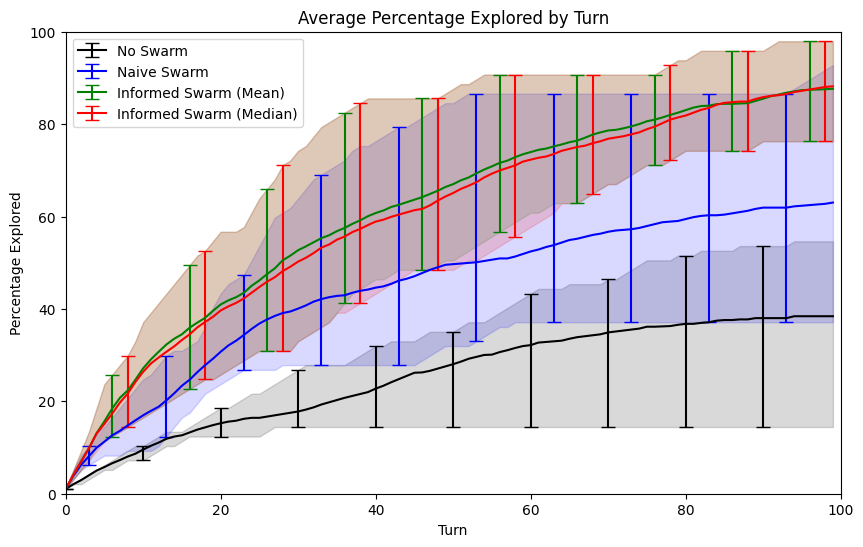

In [44]:
# Plot the avg results for each swarm type as a function of turns
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the no swarm results with error bars
ax.errorbar(
    experiment1_results.index,
    experiment1_results['no-swarm-avg'],
    yerr=[experiment1_results['no-swarm-avg'] - experiment1_results['no-swarm-min'], experiment1_results['no-swarm-max'] - experiment1_results['no-swarm-avg']],
    errorevery=(0,10),
    label='No Swarm',
    color='black',
    capsize=5)

# Plot the naive swarm results with error bars
ax.errorbar(
    experiment1_results.index,
    experiment1_results['naive-avg'],
    yerr=[experiment1_results['naive-avg'] - experiment1_results['naive-min'], experiment1_results['naive-max'] - experiment1_results['naive-avg']],
    errorevery=(3,10),
    label='Naive Swarm',
    color='blue',
    capsize=5)

# Plot the informed swarm results
ax.errorbar(
    experiment1_results.index, 
    experiment1_results['informed-mean-avg'], 
    yerr=[experiment1_results['informed-mean-avg'] - experiment1_results['informed-mean-min'], experiment1_results['informed-mean-max'] - experiment1_results['informed-mean-avg']], 
    errorevery=(6,10),
    label='Informed Swarm (Mean)', 
    color='green',
    capsize=5)

# Plot the informed swarm results
ax.errorbar(
    experiment1_results.index, 
    experiment1_results['informed-median-avg'], 
    yerr=[experiment1_results['informed-median-avg'] - experiment1_results['informed-median-min'], experiment1_results['informed-median-max'] - experiment1_results['informed-median-avg']], 
    errorevery=(8,10),
    label='Informed Swarm (Median)', 
    color='red',
    capsize=5)

# Function to fill in the area between the error bars
def fill_area_between_min_and_max(swarm_type, colour=None, alpha=0.3):
    x = experiment1_results.index.astype(int)
    y1 = experiment1_results[f'{swarm_type}-min'].astype(float)
    y2 = experiment1_results[f'{swarm_type}-max'].astype(float)
    
    if colour is None:
        colour = 'lightblue'
        
    ax.fill_between(x, y1, y2, color=colour, alpha=alpha)
    
# Fill in the area between the error bars for the no swarm
fill_area_between_min_and_max('no-swarm', colour='black', alpha=0.15)

# Fill in the area between the error bars for the naive swarm
fill_area_between_min_and_max('naive', colour='blue', alpha=0.15)

# Fill in the area between the error bars for the informed swarm (mean)
fill_area_between_min_and_max('informed-mean', colour='green', alpha=0.15)

# Fill in the area between the error bars for the informed swarm (median)
fill_area_between_min_and_max('informed-median', colour='red', alpha=0.15)
    

# Set the title and labels
ax.set_title("Average Percentage Explored by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Percentage Explored")

# Set the legend
ax.legend()

# Set the y axis to be between 0 and 100
ax.set_ylim(0, 100)

# Set the x axis to be between 0 and 100
ax.set_xlim(0, 100)

# Show the plot
plt.show()

(0.0, 100.0)

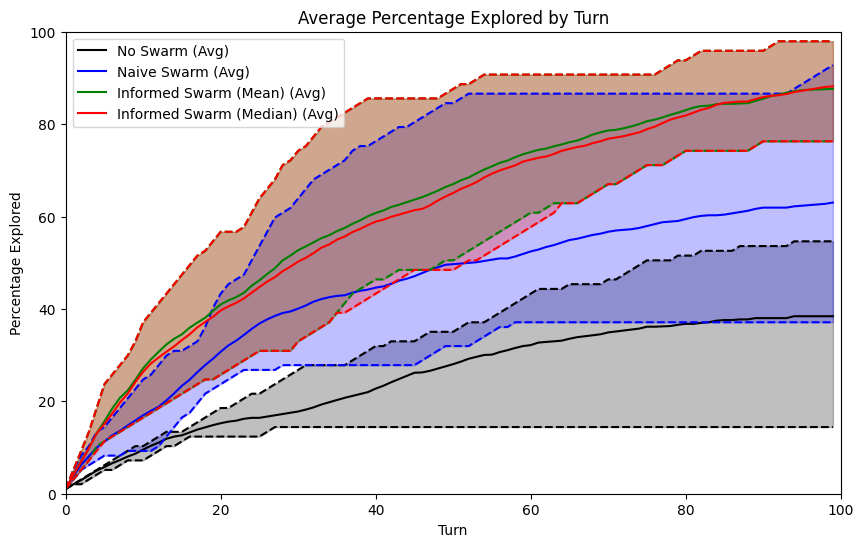

In [45]:
# Plot the avg results for each swarm type as a function of turns
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the no swarm results
ax.plot(
    experiment1_results.index,
    experiment1_results['no-swarm-avg'],
    label='No Swarm (Avg)',
    color='black')

ax.plot(
    experiment1_results.index,
    experiment1_results['no-swarm-min'],
    color='black',
    linestyle='dashed')

ax.plot(
    experiment1_results.index,
    experiment1_results['no-swarm-max'],
    color='black',
    linestyle='dashed')

# Plot the naive swarm results
ax.plot(
    experiment1_results.index,
    experiment1_results['naive-avg'],
    label='Naive Swarm (Avg)',
    color='blue')

ax.plot(
    experiment1_results.index,
    experiment1_results['naive-min'],
    color='blue',
    linestyle='dashed')

ax.plot(
    experiment1_results.index,
    experiment1_results['naive-max'],
    color='blue',
    linestyle='dashed')

# Plot the informed swarm results
ax.plot(
    experiment1_results.index,
    experiment1_results['informed-mean-avg'],
    label='Informed Swarm (Mean) (Avg)',
    color='green')

ax.plot(
    experiment1_results.index,
    experiment1_results['informed-mean-min'],
    color='green',
    linestyle='dashed')

ax.plot(
    experiment1_results.index,
    experiment1_results['informed-mean-max'],
    color='green',
    linestyle='dashed')

# Plot the informed swarm results
ax.plot(
    experiment1_results.index,
    experiment1_results['informed-median-avg'],
    label='Informed Swarm (Median) (Avg)',
    color='red')

ax.plot(
    experiment1_results.index,
    experiment1_results['informed-median-min'],
    color='red',
    linestyle='dashed')

ax.plot(
    experiment1_results.index,
    experiment1_results['informed-median-max'],
    color='red',
    linestyle='dashed')

# Function to fill in the area between the min and max for a given swarm type
def fill_area_between_min_and_max(swarm_type, colour=None, alpha=0.3):
    x = experiment1_results.index.astype(int)
    y1 = experiment1_results[f'{swarm_type}-min'].astype(float)
    y2 = experiment1_results[f'{swarm_type}-max'].astype(float)
    
    if colour is None:
        colour = 'lightblue'
        
    ax.fill_between(x, y1, y2, alpha=0.25, color=colour)

# Fill in the area between the min and max for the no swarm
fill_area_between_min_and_max('no-swarm', colour='black', alpha=0.25)

# Fill in the area between the min and max for the naive swarm
fill_area_between_min_and_max('naive', colour='blue', alpha=0.25)

# Fill in the area between the min and max for the informed swarm (mean)
fill_area_between_min_and_max('informed-mean', colour='green', alpha=0.25)

# Fill in the area between the min and max for the informed swarm (median)
fill_area_between_min_and_max('informed-median', colour='red', alpha=0.25)

# Set the title and labels
ax.set_title("Average Percentage Explored by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Percentage Explored")

# Set the legend
ax.legend()

# Set the y axis to be between 0 and 100
ax.set_ylim(0, 100)

# Set the x axis to be between 0 and 100
ax.set_xlim(0, 100)

# Show the plot
# plt.show()

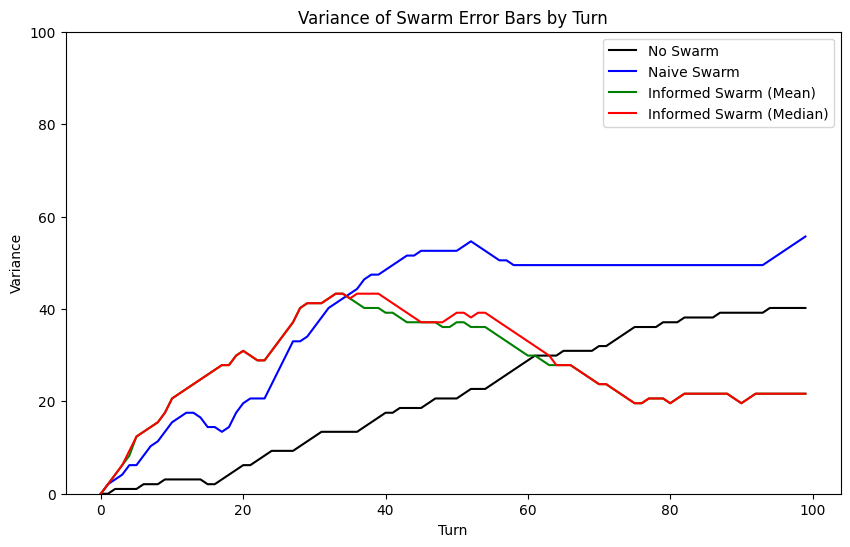

In [19]:
# Get the variance of the swarm error bars for each swarm type as a function of turns
no_swarm_var, naive_swarm_var, informed_mean_var, informed_median_var = pd.Series(dtype=float), pd.Series(dtype=float), pd.Series(dtype=float), pd.Series(dtype=float)
no_swarm_var = experiment1_results['no-swarm-max'] - experiment1_results['no-swarm-min']
naive_swarm_var = experiment1_results['naive-max'] - experiment1_results['naive-min']
informed_mean_var = experiment1_results['informed-mean-max'] - experiment1_results['informed-mean-min']
informed_median_var = experiment1_results['informed-median-max'] - experiment1_results['informed-median-min']

# Plot the variance of the swarm error bars for each swarm type as a function of turns
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the no swarm results
ax.plot(
    experiment1_results.index,
    no_swarm_var,
    label='No Swarm',
    color='black')

# Plot the naive swarm results
ax.plot(
    experiment1_results.index,
    naive_swarm_var,
    label='Naive Swarm',
    color='blue')

# Plot the informed (mean) swarm results
ax.plot(
    experiment1_results.index,
    informed_mean_var,
    label='Informed Swarm (Mean)',
    color='green')

# Plot the informed (median) swarm results
ax.plot(
    experiment1_results.index,
    informed_median_var,
    label='Informed Swarm (Median)',
    color='red')

# Set the title and labels
ax.set_title("Variance of Swarm Error Bars by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Variance")

# Set the legend
ax.legend()

# Set the y axis to be between 0 and 100
ax.set_ylim(0, 100)

# Show the plot
plt.show()